In [14]:
import pandas as pd
import re

def preprocess_text(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data = []
    work_title = ''
    subdiv_title = ''
    
    for line in lines:
        line = line.strip()
        if line.startswith('==') and line.endswith('=='):
            work_title = line[2:-2].strip()
        elif line.startswith('[') and line.endswith(']'):
            subdiv_title = line[1:-1].strip()
        elif line:
            data.append((work_title, subdiv_title, line))
    
    df = pd.DataFrame(data, columns=['Work Title', 'Subdivision Title', 'Line'])
    return df

# Replace 'path_to_text_file.txt' with the path to your annotated text file
df = preprocess_text('KarmaPolice.txt')
df.to_csv('Karma_police.csv', index=False)

print(f"Lyrics have been saved to 'Karma_police.csv'")


Lyrics have been saved to 'Karma_police.csv'


In [4]:
import pandas as pd

df = pd.read_csv('../Lyrical_Verses_csv/Karma_Police.csv')

In [5]:
df

,Work Title,Subdivision Title,Line
0,karma police,verse 1,karma police arrest this man
1,karma police,verse 1,he talks in maths
2,karma police,verse 1,he buzzes like a fridge
3,karma police,verse 1,hes like a detuned radio
4,karma police,verse 2,karma police arrest this girl
5,karma police,verse 2,her hitler hairdo is making me feel ill
6,karma police,verse 2,and we have crashed her party
7,karma police,chorus,this is what you get
8,karma police,chorus,this is what you get
9,karma police,chorus,this is what you get


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_text(dataframe):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(dataframe['Line'])
    return tfidf_matrix, vectorizer

tfidf_matrix, vectorizer = vectorize_text(df)


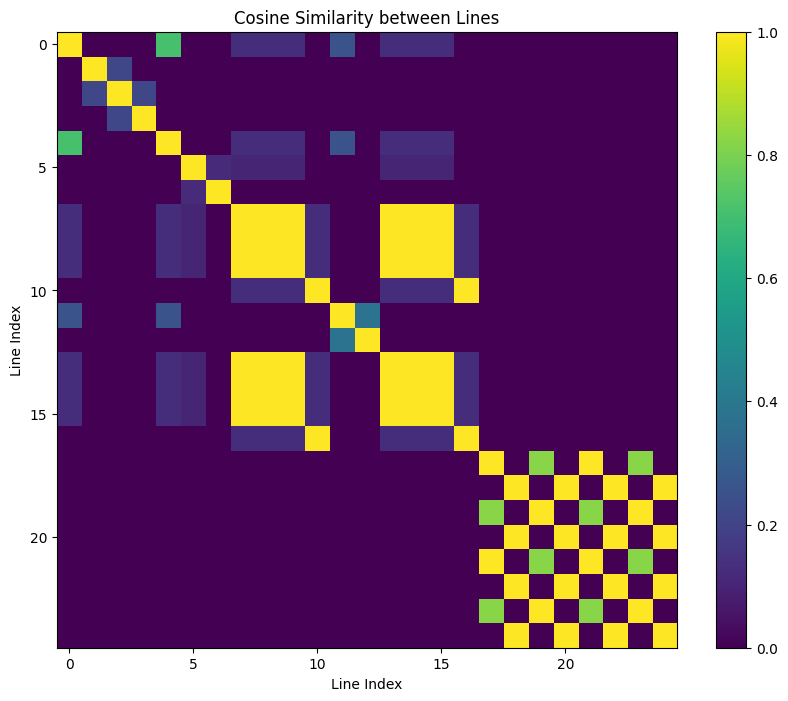

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def visualize_similarity(tfidf_matrix):
    cosine_sim = cosine_similarity(tfidf_matrix)
    plt.figure(figsize=(10, 8))
    plt.imshow(cosine_sim, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Cosine Similarity between Lines')
    plt.xlabel('Line Index')
    plt.ylabel('Line Index')
    plt.show()

visualize_similarity(tfidf_matrix)


In [13]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained model tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize input text
input_ids = []
for line in df['Line']:
    encoded_line = tokenizer.encode(line, add_special_tokens=True)
    input_ids.append(encoded_line)

# Pad sequences to ensure uniform length
input_ids = torch.tensor([x + [0]*(max(map(len, input_ids))-len(x)) for x in input_ids])

# Load pre-trained model
model = BertModel.from_pretrained('bert-base-uncased')

# Generate embeddings
with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs.last_hidden_state.mean(dim=1)


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings)


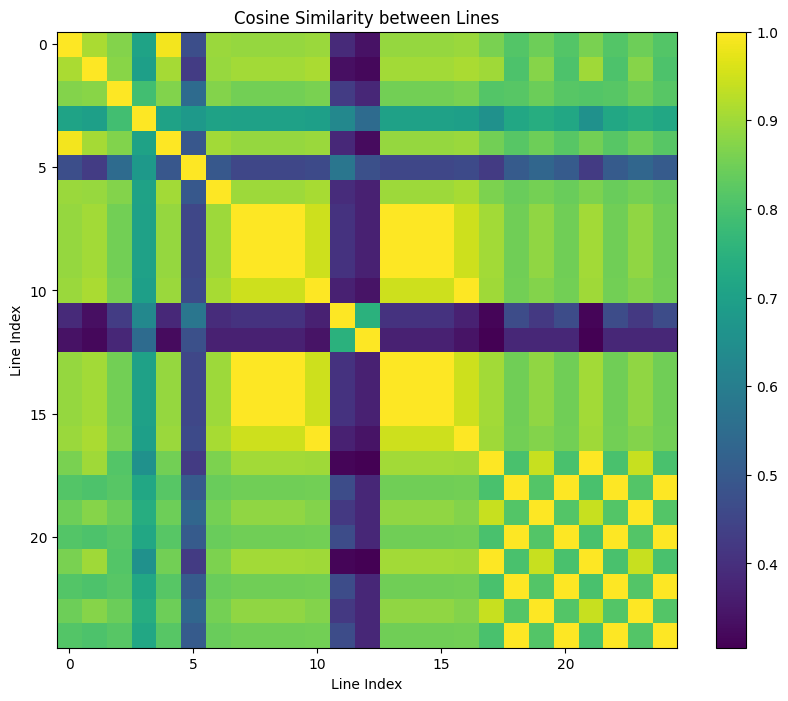

In [16]:
import matplotlib.pyplot as plt

def visualize_similarity(cosine_sim):
    plt.figure(figsize=(10, 8))
    plt.imshow(cosine_sim, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Cosine Similarity between Lines')
    plt.xlabel('Line Index')
    plt.ylabel('Line Index')
    plt.show()

visualize_similarity(cosine_sim)


In [24]:
import numpy as np

def compute_fractal_dimension(cosine_sim, threshold=0.5):
    points = np.argwhere(cosine_sim > threshold)
    distances = np.sqrt((points[:, 0] - points[:, 1])**2)
    radii = np.linspace(1, distances.max(), 50)
    mass = [np.sum(distances < r) for r in radii]
    
    log_radii = np.log(radii)
    log_mass = np.log(mass)
    
    slope, _ = np.polyfit(log_radii, log_mass, 1)
    fractal_dimension = slope
    return fractal_dimension

fractal_dimension = compute_fractal_dimension(cosine_sim)
print(f"Fractal Dimension: {fractal_dimension}")


Fractal Dimension: 0.81194009488293
